# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import pylab
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Q1. Is the distribution of body temperatures normal?.
Visually check the distribution by ploting a histogram and use normal test to find the distribution.

/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Temperature \n Mean:98.249 *** Std. Dev:0.7331 *** Mode:98.0')

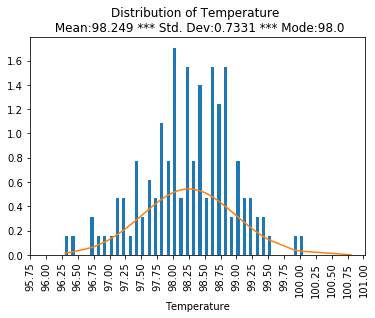

In [6]:
temp_obs = df.temperature.sort_values()
bin_values = np.arange(start=temp_obs.min(), stop=temp_obs.max(), step=.05)
mu, std = temp_obs.mean(),temp_obs.std()
p=norm.pdf(temp_obs,mu,std)
plt.hist(temp_obs,bins=bin_values,normed=True,stacked=True)
plt.plot(temp_obs, p)
plt.xlabel('Temperature')
#xticks = np.arange(96.0,101.0,0.1)
xticks = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
plt.title(('Distribution of Temperature \n Mean:'+('{:3.6}'.format(str(mu)))+
           ' *** Std. Dev:'+('{:1.6}'.format(str(std)))+
          ' *** Mode:'+('{:3.6}'.format(str(temp_obs.mode().values[0])))))

In [23]:
k2,p=stats.normaltest(temp_obs)
if p < 0.05:
    print("The distribution is not normal as p < 0.05")
else:
    print("The distribution is normal as p > 0.05")

The distribution is normal as p > 0.05


## Q2. Is the sample size large. Are the observations independent?.
Central Limit Theorem (CLT) is used. If sample size > 30 then it is sufficient for CLT. Samples are independent because they are taken from different people.

In [10]:
df[df.temperature.isnull()]

,temperature,gender,heart_rate


In [11]:
print('The sample size is {:3.6} '.format(str(len(df)))+'and is greater than 30')

The sample size is 130 and is greater than 30


## Q3. Is the true population mean really 98.6 degrees F? 
The null hypothesis states the following.
<br>
Ho: True Population Mean is 98.6 F 
<br>
H1: True Population Mean is not 98.6 F
### One sample bootstrap hypothesis test 

In [20]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
# Make an array of translated temperature: translated_T
translated_T = df.temperature - np.mean(df.temperature) + 98.6
# Take bootstrap replicates : bs_replicates_T
bs_replicates_T = draw_bs_reps(translated_T, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates_T <= np.mean(df.temperature)) / 10000
# Print the p-value
print('One sample bootstrap hypothesis test p value is {:.4}'.format(p))
if p<0.05:
    print('Ho must be rejected. True Population Mean is NOT 98.6 F')
else:
    print('Ho is True. True Population mean is 98.6 F.')


One sample bootstrap hypothesis test p value is 0.0
Ho must be rejected. True Population Mean is NOT 98.6 F


In [43]:
## Calculate t- value  (t-value= signal/noise)
median=df.temperature.median()
sample_size=df.temperature.size

signal=mu-98.6
noise=std/(sample_size**0.5)
z_val=signal/noise

# Probability that True Mean is within 5.45 std of 98.25 F
P_value=stats.norm.cdf(z_val) * 2 
P_value=stats.norm.sf(abs(z_val))*2 # two sided formulae
print ('Sample mean is {:.4}F'.format(mu)+' which is {:.3} standard error units below 98.6 F,' \
      .format(z_val)+' p value is {:.3}'.format(P_value))
if P_value<0.05:
    print('Ho must be rejected. True Population Mean is NOT 98.6 F')
else:
    print('Ho is True. True Population mean is 98.6 F.')

Sample mean is 98.25F which is -5.45 standard error units below 98.6 F, p value is 4.9e-08
Ho must be rejected. True Population Mean is NOT 98.6 F


In [59]:
#Comparing Z-statistic and t-statistic
t_val=signal/noise       # n=130, df=129
#Calculate critical t-value
# n=130, p<0.05, 2-tail
critical_t=stats.t.ppf(1-0.025, 129)
moe_t=critical_t*std/np.sqrt(130)
#Calculate critical z-value
# CI=95%, 2-tail= CI=97.5%, 1-tail
critical_z=stats.norm.ppf(0.975)
moe_z=std*critical_z/np.sqrt(130)
# Range of true mean using z-statistic with 95% confidence level
mu_z1=mu+moe_z
mu_z2=mu-moe_z

# Range of true mean using t- statistic with 95% confidence level, n=130 so degrees of freedom=129
mu_t1=mu+moe_t
mu_t2=mu-moe_t

print('Using z-statistic with 95% confindence level, range of true mean is {:.4}F ' \
      .format(mu_z1)+'to {:.4}F.'.format(mu_z2))
print('Using t-statistic with 95% confindence level, range of true mean is {:.4}F ' \
      .format(mu_t1)+'to {:.4}F.'.format(mu_t2))

Using z-statistic with 95% confindence level, range of true mean is 98.38F to 98.12F.
Using t-statistic with 95% confindence level, range of true mean is 98.38F to 98.12F.


One sample test is appropriate to use since a set of temperatures will be tested against the population mean of 98.6 F. Z-statistic is appropriate to use in this case since sample size>30. If calculated p_value is < assumed p_value of 0.05, then Ho will be rejected.

## Q5. At what temperature should we consider someone's temperature to be "abnormal"? 
#Start by computing the margin of error and confidence interval. 

Normal temperature range is  98.12  F to  98.38  F. Outside this range is ABNORMAL!


Text(0.5,1,'Normal Human Body Temperature')

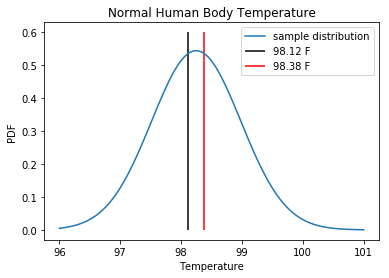

In [66]:
moe_z = 1.96 * std/ np.sqrt(130)
ci = mu + np.array([-1, 1]) * moe_z
print("Normal temperature range is ", round(mu_z2,2), " F to ", round(mu_z1,2), " F. Outside this range is ABNORMAL!")

x = np.linspace(96,101,130)
y = stats.norm.pdf(x, loc=mu, scale=std)    
pylab.plot(x,y)

pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(mean_t2,0, 0.6)
pylab.vlines(mean_t1,0,0.6,color='red')

pylab.legend(['sample distribution','98.12 F', '98.38 F'])
pylab.title('Normal Human Body Temperature')

## Q6. Is there a significant difference between males and females in normal temperature? 


In [77]:
##Male Temperatures
men=df[df.gender=='M']
men_mean_temp=men.temperature.mean()
men_std_temp=men.temperature.std()
##Female Temperatures
female=df[df.gender=='F']
female_mean_temp=female.temperature.mean()
female_std_temp=female.temperature.std()
## Diference in mean of Male and Female temperatures
mean_diff_gender=female_mean_temp - men_mean_temp
## Standard Error Calculation
SE=((men_std_temp**2)/65 + (female_std_temp**2)/65)**0.5
F1=female_std_temp**2/65
M1=men_std_temp**2/65

DF=((F1+M1)**2)/(((F1**2)/64)+((M1**2)/64))

## Use 0.05 Significance level in two sample t-test
t_val=((female_mean_temp-men_mean_temp)-0)/SE
p_value = stats.t.sf(np.abs(2.29), 128)*2  # two-sided pvalue = Prob(abs(t)>tt)

if p_value<0.05:
    print('Ho that mean of female and male temperature are the same will be rejected.')
    print('There is significance difference between male and female body temperatures.')
else: 
    print('Ho: Mean of female and male temperature are the same IS TRUE!')

Ho that mean of female and male temperature are the same will be rejected.
There is significance difference between male and female body temperatures.


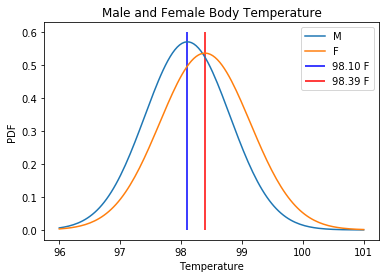

In [80]:
##Normal Distribution graph of Male and Female Temperatures
x = np.linspace(96,101,130)
y1 = stats.norm.pdf(x, loc=men_mean_temp, scale=men_std_temp)    
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=female_mean_temp, scale=female_std_temp)    
pylab.plot(x,y2)
pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(men_mean_temp,0, 0.6, color='blue')
pylab.vlines(female_mean_temp,0,0.6, color='red')
pylab.legend(['M', 'F', '98.10 F', '98.39 F'])
pylab.title('Male and Female Body Temperature')
pylab.show()